# Linear Regression

## Simple Linear Regression

### Linear Regression Hypothesis

Regression problems are those that, given an independent variable (x) we can predict the result of a second (y).

Simple Linear regression results in a linear system where the hypothesis is:

$$Hypothesis: h_0(x) = \theta_0 + \theta_1 \cdot x$$

where:

* $h_0(x):$ is the prediction, that is, the variable y.
* $\theta_0\ and\ \theta_1:$ Are the parameters that the algorithm tries to find such that the prediction error is as small as possible.

### Cost Function

The process of the algorithm is, the parameters $\theta_0\ and\ \theta_1$ are initialized randomly. For example:

$$Parameters = [0, 0]$$

The algorithm will proceed to make the first prediction. For each value of the variable $x$, a variable $y$ is predicted, to differentiate, we will call this variable $y$ as $y_{pred}$.

Once all the predictions are made, the cost is calculated. The formula to calculate it is as follows:

$$J(\theta_0,\ \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^i) - y^i)^2$$

where:
* $m$: It is the number of samples that are being analyzed, or the number of examples.
* $h_0(x^i)$: It is the result of the prediction calculated previously, that is, the value of the variable $y_{pred}$.

The final objective of the algorithm is to minimize $J(\theta_0,\ \theta_1)$, that is, to find the optimal $\theta_0\ and\ \theta_1$ that minimize the cost or also called loss.

So far we can summarize that we have:

* Hypothesis: $h_0(x) = \theta_0 + \theta_1 \cdot x$.
* Parameters: $\theta_0,\ \theta_1$
* Cost function: $J(\theta_0,\ \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^i) - y^i)^2$
* Target: $min\ J(\theta_0,\ \theta_1)$

### Gradient Descent

Gradient descent is an optimization algorithm that helps us find the minimum cost of a regression problem.

To find the minimum in an equation, multivariable calculus is used, partial derivatives are applied to the cost function, with respect to each parameter $\theta_0\ and\ \theta_1$. In addition, a learning rate is established that helps to recalculate the parameters until it converges to a minimum. In this sense, the algorithm is expressed as follows.

Repeat until converge {
    $$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}\ J(\theta_0,\ \theta_1)$$
    $$(For\ j = 1\ and\ j = 0)$$

}

where:
* $\alpha$ is the learning rate.

**Partial derivatives for $\theta_0\ and\ \theta_1$**

$$j = 0\ :\ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^ i)$$
$$j = 1\ :\ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^ i)\cdot x^i$$

Given these derivatives, the algorithm is as follows:

Repeat until converge {
    $$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)$$
    $$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)\cdot x^i$$
    
* Update $\theta_0$

* Update $\theta_1$


}

### Code Implementation

In [1]:
import time
from IPython.display import clear_output

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

One of the dataset par excellence to understand the Linear Regression algorithm is that of the price of houses in Boston.

The data is available at the following link. [Link](https://www.kaggle.com/vikrishnan/boston-house-prices)

In [2]:
data = pd.read_csv('../data/housing.csv', header=None, sep='\s+')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


We see that the dataset does not have columns, luckily Kaggle provides us with their names to be able to add them.

* CRIM: crime rate in the area.
* ZN: proportion of residential land zoned for lots over 25,000 square feet.
* INDUS: proportion of commercial non-retail acres by city.
* CHAS: Charles River dummy (= 1 if the reach borders the river; 0 otherwise).
* NOX: concentration of nitric oxides (parts per 10 million).
* RM: average number of rooms per dwelling.
* AGE: proportion of owner-occupied units built before 1940.
* DIS: weighted distances to five Boston employment centers.
* RAD: index of accessibility to radial roads.
*TAX: Full value property tax rate per $10,000.
PTRATIO: student-teacher ratio by city.
* B: 1000 * (Bk−0.63)2 where Bk is the proportion of blacks per city.
* LSTAT: \% of the population with lower status.
* MEDV: median value of owner-occupied homes in thousands of dollars.

In [3]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
          'B', 'LSTAT', 'MEDV']

data.columns = columns
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The average price of the house (MEDV) will be predicted with respect to the number of rooms that make it up (RM).

In [4]:
# Variables needed for the model
m = len(data)
x = data['RM']
y = data['MEDV']

Prediction in the iteration 50000
Cost in the iteration 50000: 21.800321736784475
Theta_0: -34.584358797761816, Theta_1: 9.088548160811078
Price = -34.584358797761816 + 9.088548160811078 * X




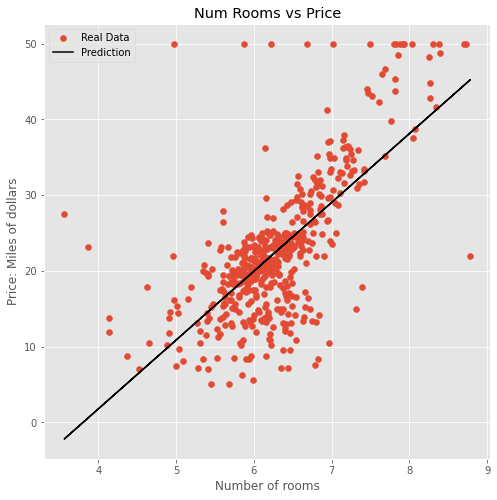

In [5]:
# Function to calculate y_pred
def get_y_pred(x, theta):
    return theta[0] + theta[1] * x

# Function to calculate the cost
def get_cost(y_pred, y):
    return (np.sum((y_pred - y).dot((y_pred - y).T))) / (2 * m)

# Gradient descent to find the optimal parameters
def get_predictions(x, y, n_iter, theta, alpha=0.01):
    for i in range(n_iter):
        # We predict y with respect to theta in the i-th iteration
        y_pred = get_y_pred(x, theta)
        
        # We calculate the parameters theta_0 and theta_1 in the i-th iteration
        theta_0 = theta[0] - (alpha * ((np.sum(y_pred - y)) / m))
        theta_1 = theta[1] - (alpha * ((np.sum((y_pred - y) * x)) / m))
        
        theta = [theta_0, theta_1]
        
        # We calculate the cost with respect to y_pred in the i-th iteration 
        cost = get_cost(y_pred, y)
        
        # We plot a visualization every 1000 iterations
        if i % 1000 == 0:
            print('Prediction in the iteration {}'.format(i))
            print('Cost in the iteration {}: {}'.format(i, cost))
            print('Theta_0: {}, Theta_1: {}'.format(theta_0, theta_1))
            print('Price = {} + {} * X'.format(theta_0, theta_1))
            print('\n')
            plt.figure(figsize=(8,8))
            plt.scatter(x, y, label='Real Data')
            plt.plot(x, y_pred, color='k', label='Prediction')
            plt.title('Num Rooms vs Price')
            plt.xlabel('Number of rooms')
            plt.ylabel('Price: Miles of dollars')
            plt.legend(loc='best')
            plt.show()
            
            time.sleep(0.1)
            clear_output(wait=True)
            
    return theta

initial_theta = theta = np.array([0,0])
n_inter = 50001

theta_optim = get_predictions(x, y, n_inter, initial_theta)

As can be seen, the cost is minimized in each iteration, and thanks to the gradient descent algorithm we can find the optimal Theta values for the prediction.

### Using SK-Learn

It is not scalable to be implementing the algorithm in code every time it is needed, for this, we can help ourselves with libraries such as Scikit Learn that already has it implemented and is very efficient. This is how we can, in a few lines of code, arrive at an optimal solution.

In [8]:
from sklearn.linear_model import LinearRegression

The difference is that Sklearn needs a 2-dimensional array to work, so the data will need to be rescaled.

In [11]:
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

# Getting the optimal theta_0 y theta_1
theta_0 = model.intercept_
theta_1 = model.coef_
theta_0, theta_1

(array([-34.67062078]), array([[9.10210898]]))

As can be seen, we have obtained the same values but with a simpler, clearer and faster implementation.

## Multiple Linear Regression

### Multiple Linear Regression Hypothesis

The simple linear regression algorithm can be very useful, but sometimes it may fall short, or for slightly more complex problems, it may not be the best alternative for making predictions.

The multiple linear regression model follows the same concept as the simple one, the difference is that now we add more than one independent variable $x$. Following this sense, the hypothesis of this algorithm is as follows:

$$Hypothesis: h_0(x) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \dots + \theta_n \cdot x_n$$

where:

* $h_0(x):$ is the prediction, that is, the variable y.
* $\theta_0, \ \theta_2, \ \dots, \ \theta_n:$ These are the parameters that the algorithm tries to find such that the prediction error is as small as possible.

### Cost Function

The cost function for this algorithm is the same as a linear model, the difference is that now more $\theta$ parameters have to be initialized, such that the number of $\theta_s$ is equal to $n+1$, where $n$ is the total of independent variables.

$$J(\theta_s) = \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^i) - y^i)^2$$

The final objective of the algorithm is to minimize $J(\theta_s)$, that is, to find the optimal $\theta_s$ that minimize the cost or also called loss.

### Gradient Descent

We take as reference the gradient descent for the linear model, the difference is that now we have to find more parameters, but the process is the same.

Repeat until converge {
     $$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)$$
     $$\theta_s\ 1-n := \theta_i - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i) - y^i)\cdot x^ i$$
    
* Update $\theta_0$

* Update $\theta_s$ from 1 to n


}

### Code Implementation

In this study case, and to illustrate how a multiple linear regression algorithm is created, we will take the same data set and add one more variable, this is the LSTAT variable.

We proceed to select the variables of the data set.

In [12]:
# Independent variables
x = data[['RM', 'LSTAT']]

# Variable to predict y
y = data['MEDV']
m = len(data)

# Adding a column of 1 to the variable x

x = x.assign(ones=1)

# Re ordenando para que los unos sean la primera columna
x = x[['ones', 'RM', 'LSTAT']].values

> **Note:** We add the first column of ones to implement a vectorized solution. Theta_0 is not multiplied with any X variable. In order not to alter this parameter, we multiply it by 1.

In [13]:
# Predict y-value
def pred_y_multy(x, thetas):
    return x.dot(thetas.T)

# Getting cost
def get_cost_multy(y_pred, y):
    return (1 / 2*m) * np.sum((y_pred - y) * (y_pred - y))

# gradient descent implementation
def get_gradient_multy(x, y, n_iter, thetas, alpha):
    for i in range(n_iter):
        y_pred = pred_y_multy(x, thetas)
        
        thetas = thetas - (alpha * ((1 / m)*((y_pred - y).T.dot(x))))
        
    return thetas

initial_thetas = np.array([0,0,0])
alpha = 0.001
n_iter = 1000000
thetas = get_gradient_multy(x,y,n_iter, initial_thetas, alpha)

print('The thetas optimal are: {}'.format(thetas))

The thetas optimal are: [-1.3528106   5.09403207 -0.64241202]


### Using Scikit-Learn

In practice, applying a code from scratch is not very scalable, fortunately, there are libraries that help us obtain results quickly and accurately. Scikit-Learn is one of the best in the field of Machine Learning. We can implement a multiple regression model with just a few lines of code.

In [15]:
from sklearn.linear_model import LinearRegression

X = data[['RM', 'LSTAT']].values
y = data['MEDV'].values.reshape(-1, 1)

slr = LinearRegression()
slr.fit(X, y)

coef = slr.coef_
intercept = slr.intercept_

print(intercept, coef)

[-1.35827281] [[ 5.09478798 -0.64235833]]


The values that Scikit-Learn gives us as a result are similar to those obtained with the algorithm applied in code.

But it should be noted that Scikit-Learn is faster and therefore a better solution.

Visually representing data with two or more analyzed characteristics is complicated, the following graph tries to highlight how the data is projected to a solution given by the algorithm. But it's not the best way to do it.

The important thing is to understand the results and make decisions based on them.

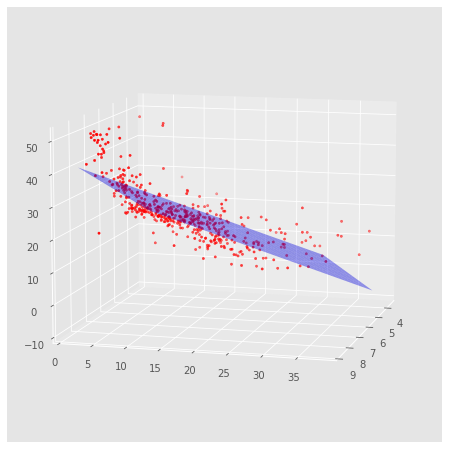

In [52]:
from mpl_toolkits.mplot3d import *

x1_range = np.arange(data['RM'].min(),data['RM'].max())
x2_range = np.arange(data['LSTAT'].min(),data['LSTAT'].max())

X1, X2 = np.meshgrid(x1_range,x2_range)

plano = pd.DataFrame({'RM':X1.ravel(), 'LSTAT':X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,pred, alpha=0.4, color='b')

ax.scatter3D(data['RM'], data['LSTAT'], data['MEDV'], color='r', marker='.')
ax.view_init(elev=10, azim=15)
plt.show()